# **Homework**

# **Spotify Music Analysis**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
from google.colab import files
files.upload()

Saving music_data.csv to music_data.csv


{'music_data.csv': b',acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist\r\n0,0.0102,0.833,204600,0.434,0.0219,2,0.165,-8.795,1,0.431,150.062,4,0.286,1,Mask Off,Future\r\n1,0.199,0.743,326933,0.359,0.00611,1,0.137,-10.401,1,0.0794,160.083,4,0.588,1,Redbone,Childish Gambino\r\n2,0.0344,0.838,185707,0.412,0.000234,2,0.159,-7.148,1,0.289,75.044,4,0.173,1,Xanny Family,Future\r\n3,0.604,0.494,199413,0.338,0.51,5,0.0922,-15.236,1,0.0261,86.468,4,0.23,1,Master Of None,Beach House\r\n4,0.18,0.678,392893,0.561,0.512,5,0.439,-11.648,0,0.0694,174.004,4,0.904,1,Parallel Lines,Junior Boys\r\n5,0.00479,0.804,251333,0.56,0,8,0.164,-6.682,1,0.185,85.023,4,0.264,1,Sneakin\xe2\x80\x99,Drake\r\n6,0.0145,0.739,241400,0.472,7.27E-06,1,0.207,-11.204,1,0.156,80.03,4,0.308,1,Childs Play,Drake\r\n7,0.0202,0.266,349667,0.348,0.664,10,0.16,-11.609,0,0.0371,144.154,4,0.393,1,Gy\xc3\xb6ngyhaj\xc3\xba l\xc3\xa1ny

In [6]:
music_dataset = pd.read_csv('music_data.csv')
music_dataset

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4,0.623,0,First Contact,Twin Moons


In [7]:
music_dataset.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1,Parallel Lines,Junior Boys


In [8]:
music_dataset.shape

(2017, 17)

In [9]:
music_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   int64  
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [10]:
music_dataset.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [11]:
music_dataset.isnull().sum()

Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [29]:
music_dataset['target'].value_counts()

1    1020
0     997
Name: target, dtype: int64

In [40]:
# seperating data and labels
X = music_dataset.drop(columns = ['song_title', 'artist', 'target'], axis = 1)
Y = music_dataset['target']

In [41]:
print(X)

      Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0              0       0.01020         0.833       204600   0.434   
1              1       0.19900         0.743       326933   0.359   
2              2       0.03440         0.838       185707   0.412   
3              3       0.60400         0.494       199413   0.338   
4              4       0.18000         0.678       392893   0.561   
...          ...           ...           ...          ...     ...   
2012        2012       0.00106         0.584       274404   0.932   
2013        2013       0.08770         0.894       182182   0.892   
2014        2014       0.00857         0.637       207200   0.935   
2015        2015       0.00164         0.557       185600   0.992   
2016        2016       0.00281         0.446       204520   0.915   

      instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0             0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1            

In [42]:
print(Y)

0       1
1       1
2       1
3       1
4       1
       ..
2012    0
2013    0
2014    0
2015    0
2016    0
Name: target, Length: 2017, dtype: int64


**Visualize the dataset**

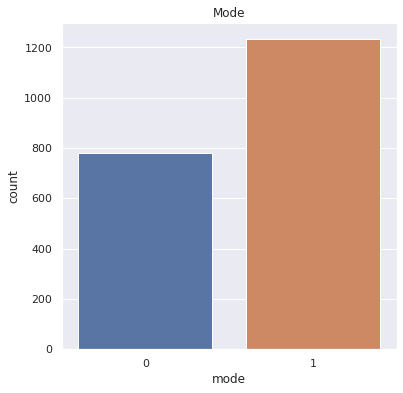

In [43]:
# mode
sns.set()
plt.figure(figsize = (6,6))
sns.countplot(x = 'mode', data = music_dataset)
plt.title('Mode')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


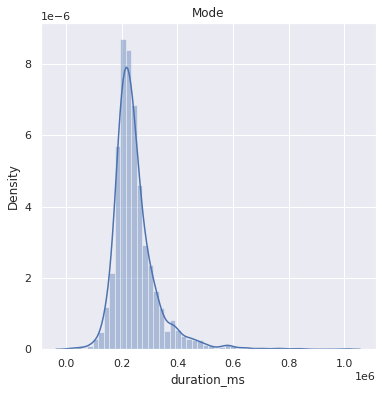

In [44]:
# Duration
sns.set()
plt.figure(figsize = (6,6))
sns.distplot(music_dataset['duration_ms'])
plt.title('Mode')
plt.show()

**Training and Testing Data**

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify = Y, random_state = 2)

In [46]:
print(X.shape, X_train.shape, X_test.shape)

(2017, 14) (1815, 14) (202, 14)


In [47]:
print(X_train)

      Unnamed: 0  acousticness  danceability  duration_ms  energy  \
458          458      0.096100         0.704       241733   0.490   
1978        1978      0.170000         0.466       183484   0.720   
1873        1873      0.580000         0.599       245960   0.699   
1175        1175      0.027500         0.516       340707   0.595   
530          530      0.000078         0.351       141305   0.931   
...          ...           ...           ...          ...     ...   
1772        1772      0.163000         0.622       249093   0.593   
838          838      0.201000         0.696       398747   0.852   
1135        1135      0.000965         0.607       212040   0.889   
872          872      0.809000         0.833       186567   0.684   
416          416      0.007900         0.428       316444   0.740   

      instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
458           0.000114    9    0.1570    -6.667     1       0.3390  155.909   
1978         

In [48]:
print(Y_train)

458     1
1978    0
1873    0
1175    0
530     1
       ..
1772    0
838     1
1135    0
872     1
416     1
Name: target, Length: 1815, dtype: int64


**Modeling using Logistic Regression**

In [49]:
model = LogisticRegression()

In [50]:
model.fit(X_train, Y_train)
LogisticRegression()

LogisticRegression()

**Model Evaluation**

In [51]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [52]:
print('The accuracy is : ', training_data_accuracy)

The accuracy is :  0.9399449035812673


In [54]:
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [55]:
print('The accuracy is :', testing_data_accuracy)

The accuracy is : 0.9306930693069307


In [56]:
input_data = (0,0.0102,0.833,204600,0.434,0.0219,2,0.165,-8.795,1,0.431,150.062,4,0.286)

In [57]:
input_data_as_numpy_array = np.array(input_data) 

In [58]:
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

In [59]:
prediction = model.predict(input_data_reshaped)
print(prediction)

[1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [67]:
input_data = (1948,0.453,0.511,406280,0.453,0.000212,3,0.0865,-6.803,0,0.0314,138.309,4,0.142)

In [68]:
input_data_as_numpy_array = np.array(input_data) 

In [69]:
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

In [70]:
prediction = model.predict(input_data_reshaped)
print(prediction)

[0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
